

#  Câu 1



In [1]:
!pip install requests
!pip install jsons
!pip install bs4

     |████████████████████████████████| 61 kB 4.0 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 


In [2]:
import requests 
import json
import bs4
from bs4 import BeautifulSoup
from datetime import datetime
import csv
import pandas as pd

In [3]:
# ngày đầu năm
first_day_of_year = '2021-01-01'
# lấy ngày hiện tại
date_now = datetime.today().strftime('%Y-%m-%d')

In [4]:
# định nghĩa headers
headers = {
    "content-Type": "application/json",
    "Host": "finfo-api.vndirect.com.vn",
    "Origin": "https://dstock.vndirect.com.vn",
    "Referer": "https://dstock.vndirect.com.vn/",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"
}

In [5]:
# API url
url_first=f'https://finfo-api.vndirect.com.vn/v4/stock_prices?sort=date&q=code:VCB~date:gte:{first_day_of_year}~date:lte:{date_now}'

# lấy data từ url
data_first = requests.get(url_first ,headers = headers).json()

In [6]:
# request lần đầu để biết tổng số ngày đã giao dịch từ đầu năm (có thể dụng bất cứ mã nào, vì số ngày giao dịch của các mã là như nhau, trong ví dụ dùng mã vcb)
days = data_first['totalElements']
days

241

In [7]:
# hiển thị trên 1 trang
number_page = 1

# Lấy 60 mã chứng khoán
list_stocks_code = ['SAB', 'TCB', 'MSN', 'SCS', 'VPB', 'CTG', 'MWG', 'DGW', 'VJC', 'NVL', 'DHG',
                    'VIC', 'SVC', 'PTB', 'VCB', 'GAS', 'HDC', 'SHB', 'PNJ', 'FPT', 'MSH', 'STB',
                    'PDR', 'PND', 'DHC', 'TMS', 'VNM', 'DPG', 'VRE', 'NTC', 'LBM', 'VHM', 'DPR',
                    'GMD', 'VCI', 'TAC', 'CTD', 'MBS', 'SJS', 'PME', 'VPG', 'IMP', 'HDG', 'PHR',
                    'SFI', 'TCM', 'HTN', 'DRL', 'HAH', 'FTS', 'SGN', 'SVI', 'REE', 'DIG', 'BVH',
                    'HPG', 'GIL', 'TV2', 'STK', 'SZL'] 

# API url
list_url = [f'https://finfo-api.vndirect.com.vn/v4/stock_prices?sort=date&q=code:{x}~date:gte:{first_day_of_year}~date:lte:{date_now}&size={days}&page={number_page}' 
            for x in list_stocks_code]

# request lần 2 để lấy số ngày đã được giao dịch từ đầu năm.
list_data = [requests.get(x, headers = headers).json() for x in list_url]

In [8]:
# lấy giá đóng cửa.
close_pricing = [[x['close'] for x in y['data']] for y in list_data]
print(close_pricing)

[[149.0, 150.0, 151.0, 152.5, 152.8, 152.3, 152.3, 152.5, 152.9, 153.0, 151.6, 157.0, 159.0, 156.5, 154.0, 156.1, 160.2, 165.0, 168.0, 168.0, 168.0, 167.1, 168.2, 170.5, 170.6, 170.0, 172.0, 172.0, 174.0, 174.0, 173.7, 172.0, 171.8, 172.6, 165.2, 162.0, 160.5, 164.6, 159.9, 155.4, 156.7, 156.5, 152.0, 155.2, 158.5, 160.0, 162.8, 160.0, 161.0, 163.0, 163.0, 162.7, 158.6, 158.4, 160.5, 155.0, 154.2, 156.4, 156.8, 157.1, 159.0, 160.0, 158.2, 158.0, 158.0, 158.3, 161.0, 161.0, 166.0, 166.0, 161.5, 151.4, 148.8, 149.9, 148.7, 149.2, 148.7, 150.0, 147.2, 148.5, 147.6, 147.2, 142.4, 140.0, 143.0, 148.0, 146.0, 145.5, 151.6, 151.8, 153.1, 154.2, 154.1, 155.1, 155.2, 155.7, 157.3, 155.3, 155.1, 159.0, 157.0, 154.5, 154.5, 153.5, 153.6, 156.3, 156.8, 155.0, 154.5, 158.0, 159.9, 160.0, 157.0, 158.8, 160.0, 162.5, 162.5, 164.0, 166.5, 169.2, 167.7, 169.1, 169.6, 171.1, 171.9, 171.9, 170.2, 167.1, 170.0, 171.2, 166.0, 169.0, 168.5, 165.5, 164.1, 160.0, 156.9, 156.8, 155.1, 153.7, 153.9, 152.0, 154.

In [9]:
# tạo dataframe từ dữ liệu đã crawl 
df = pd.DataFrame(close_pricing)
df = df.transpose()
df.columns = list_stocks_code
df

,SAB,TCB,MSN,SCS,VPB,CTG,MWG,DGW,VJC,NVL,DHG,VIC,SVC,PTB,VCB,GAS,HDC,SHB,PNJ,FPT,MSH,STB,PDR,PND,DHC,TMS,VNM,DPG,VRE,NTC,LBM,VHM,DPR,GMD,VCI,TAC,CTD,MBS,SJS,PME,VPG,IMP,HDG,PHR,SFI,TCM,HTN,DRL,HAH,FTS,SGN,SVI,REE,DIG,BVH,HPG,GIL,TV2,STK,SZL
0,149.0,49.85,161.0,156.0,34.40,32.90,133.3,123.8,120.6,114.5,130.6,100.9,132.9,102.5,99.0,97.2,103.60,22.20,94.5,95.9,80.30,28.55,96.3,14.9,85.3,82.0,85.9,75.30,31.25,184.0,83.5,84.9,73.50,48.45,77.9,77.00,89.8,41.1,78.9,80.2,58.40,75.7,74.80,72.0,74.80,71.9,47.5,65.1,68.70,63.40,68.5,74.0,67.1,89.00,57.4,47.00,65.60,66.2,59.80,63.5
1,150.0,49.85,157.5,156.0,33.80,32.95,134.5,124.9,122.5,115.2,123.6,102.0,132.9,103.6,96.5,99.0,104.80,22.20,95.5,96.4,82.40,28.30,95.5,14.9,85.3,83.5,85.7,76.30,30.80,186.0,81.0,84.5,75.90,49.30,75.0,77.00,91.3,40.0,78.7,75.0,72.90,77.7,76.00,73.0,74.80,73.5,47.8,65.0,70.60,62.50,69.5,74.0,67.6,91.00,57.6,46.70,66.00,67.2,61.00,65.6
2,151.0,49.85,160.0,155.0,33.70,32.50,133.6,122.7,122.8,115.0,130.0,100.0,142.9,102.0,99.1,98.6,101.10,22.15,93.7,95.5,83.50,28.60,97.7,14.9,86.1,84.3,86.6,71.40,30.10,187.0,83.5,82.3,77.10,49.50,73.9,75.50,91.3,38.6,78.7,77.0,72.60,77.6,75.20,72.0,74.90,74.0,46.1,64.6,71.80,61.50,69.6,74.0,67.2,87.20,58.0,47.50,66.00,67.6,60.40,65.8
3,152.5,50.20,161.0,153.0,34.65,32.25,135.9,123.6,124.0,115.0,135.8,100.0,143.0,97.8,99.9,97.7,101.00,22.30,96.0,95.9,80.30,28.35,94.0,14.9,87.3,84.6,86.3,75.00,30.40,193.0,81.5,82.6,78.30,50.30,75.3,77.10,91.2,39.5,78.7,75.0,73.90,77.6,74.00,73.1,74.70,71.8,44.2,64.6,72.20,62.20,69.6,74.0,66.0,81.50,58.2,47.80,66.60,66.3,60.00,65.5
4,152.8,50.10,157.0,149.6,35.00,32.40,135.4,123.7,124.0,113.1,134.2,102.5,148.8,97.8,99.3,98.2,105.80,22.20,96.2,95.7,84.00,28.10,92.5,14.9,86.7,84.6,86.3,74.40,30.20,192.0,82.0,82.1,79.00,48.70,76.5,77.00,88.3,40.4,79.5,75.1,75.00,77.5,75.00,72.5,73.90,71.9,45.6,64.6,68.90,63.00,69.7,74.0,68.7,77.90,58.5,47.70,67.00,67.1,61.80,65.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,198.2,35.70,93.1,129.7,35.55,38.70,121.8,81.9,126.5,75.7,108.0,111.8,72.0,61.4,104.8,92.7,39.50,19.10,82.4,63.3,41.75,19.40,51.4,13.2,64.0,37.5,112.0,33.20,35.50,297.0,49.3,96.4,45.30,33.90,60.4,50.80,76.9,21.0,29.8,NaN,18.80,57.9,43.20,65.5,32.10,58.0,41.0,54.0,19.50,18.10,71.0,86.4,51.3,31.55,68.3,42.75,43.35,56.7,20.90,56.9
237,197.8,34.60,92.0,129.6,34.90,38.85,120.8,82.5,124.6,71.3,108.3,110.1,72.0,60.0,107.0,92.7,40.00,19.20,81.6,62.5,41.70,18.45,51.6,13.2,64.0,36.7,110.4,33.80,33.90,287.0,46.1,94.8,44.65,34.00,61.4,47.50,75.8,20.9,29.6,NaN,19.20,57.9,43.30,64.4,32.50,55.0,41.0,54.3,19.40,17.90,71.3,86.4,51.0,31.80,67.0,42.80,43.85,56.8,21.00,56.8
238,198.5,33.20,88.3,129.6,34.40,37.85,121.3,82.5,123.7,66.7,106.3,110.2,72.0,60.3,105.0,90.4,40.20,17.80,81.2,62.4,41.75,18.00,51.9,12.7,61.0,35.9,109.8,32.55,33.20,288.0,43.1,94.8,44.65,33.40,61.0,46.50,76.2,19.0,27.7,NaN,19.25,58.0,43.30,64.9,32.45,54.5,41.4,54.3,18.15,17.30,71.0,86.6,50.0,31.20,66.5,42.80,42.50,56.7,20.95,56.5
239,199.0,33.05,89.3,129.5,34.35,35.40,121.9,82.9,124.8,65.0,104.6,109.7,71.0,61.0,99.3,90.0,40.35,17.70,81.3,62.7,41.75,17.70,51.4,11.1,60.9,35.3,110.8,32.10,33.30,289.7,42.8,95.6,44.60,33.80,62.8,45.45,76.5,17.3,28.0,NaN,19.15,57.8,44.35,64.3,31.50,53.9,40.6,53.5,18.45,17.30,70.6,91.4,50.2,31.50,66.0,42.35,41.70,53.4,21.00,57.1


In [10]:
# 60 mã và số ngày đã giao dịch tính từ đầu năm đến hiện tại
print(df.shape)

(241, 60)


In [11]:
# ghi file
df.to_csv('close_pring.csv', sep='\t',  index = False)

# Câu 2

## TimeSeriesScalerMeanVariance

In [12]:
pip install tslearn

     |████████████████████████████████| 793 kB 7.1 MB/s 


In [13]:
import numpy
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [14]:
#append vào stosks
stocks=[]
stocks_name=[]
for i in range(len(list_stocks_code)):
  stocks_name.append(list_stocks_code[i])
  stocks.append(df.values[:,i])

In [15]:
#Normalize stocks bằng TimeSeriesScalerMeanVariance
MeanVariance_Normalized = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(stocks)

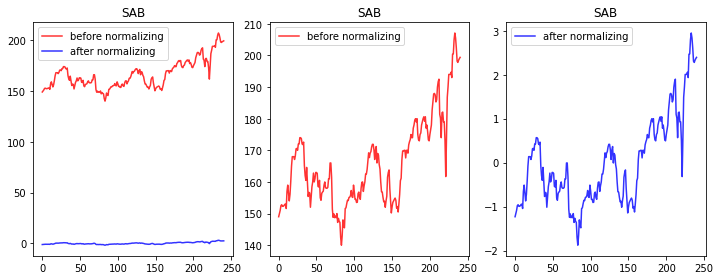

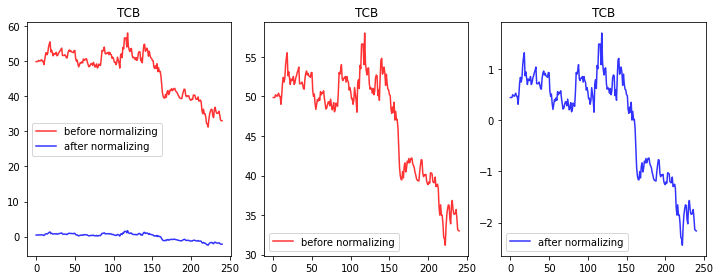

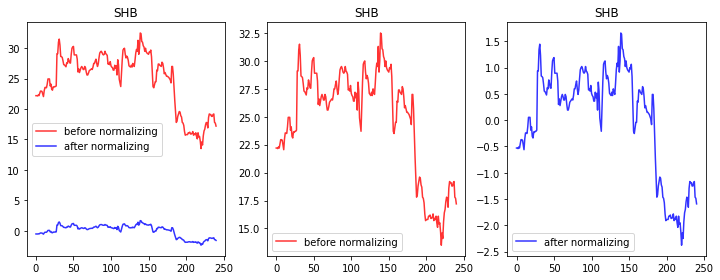

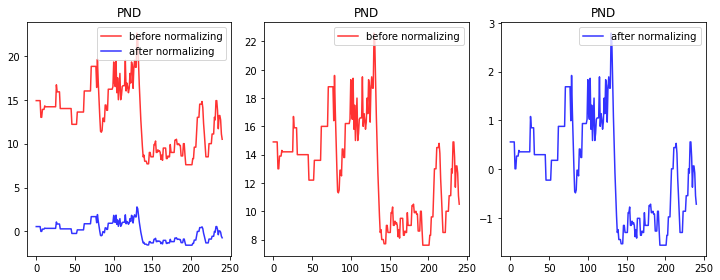

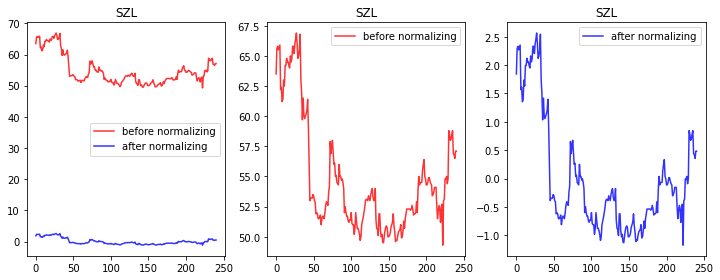

In [16]:
#plot
five_stock=[0,1,17,23,59]
for i in five_stock:
  fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
  # ảnh 1 trước và sau khi Normalize
  ax1.plot(stocks[i].ravel(), "r-", alpha=.8, label='before normalizing')
  ax1.plot(MeanVariance_Normalized[i].ravel(), "b-", alpha=.8, label='after normalizing')
  # ảnh 2 trước khi Normalize
  ax2.plot(stocks[i].ravel(), "r-", alpha=.8, label='before normalizing')
  # ảnh 3 sau khi Normalize
  ax3.plot(MeanVariance_Normalized[i].ravel(), "b-", alpha=.8, label='after normalizing')
  # Title
  ax1.set_title(stocks_name[i]); 
  ax2.set_title(stocks_name[i])
  ax3.set_title(stocks_name[i])
  ax1.legend(loc='best')
  ax2.legend(loc='best')
  ax3.legend(loc='best') 
  plt.tight_layout()
  plt.show()

## MinMaxScaler

In [17]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
# train normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(stocks)

In [19]:
#Normalize 
MinMaxScaler_Normalized = scaler.transform(stocks)
print(MinMaxScaler_Normalized[0])

[0.79302188 0.78959673 0.79081929 0.77259966 0.77865613 0.78469446
 0.79147727 0.78902715 0.79839173 0.80265436 0.80952381 0.82153138
 0.81211441 0.79143493 0.78187919 0.80487805 0.82346306 0.82948295
 0.86647887 0.87835523 0.89262914 0.85276074 0.8248527  0.84349703
 0.85557987 0.8569857  0.86134221 0.88642817 0.90809879 0.91758561
 0.92226768 0.96165551 0.99245283 1.         0.94205607 0.925
 0.90487956 0.95923567 0.94068343 0.91225806 0.91827542 0.9047619
 0.87452471 0.91747888 0.93831169 0.94620868 0.96045918 0.93190416
 0.93880126 0.95564005 0.95382669 0.95373891 0.90762554 0.8960396
 0.94713088 0.9229765  0.88762626 0.87985213 0.86630369 0.85011848
 0.85378743 0.84918794 0.82291667 0.81750144 0.80727686 0.80440927
 0.82386364 0.82574032 0.85227273 0.82056893 0.76578947 0.70121629
 0.71038251 0.72072567 0.70713119 0.71569704 0.71688742 0.72526258
 0.7373168  0.74379688 0.75043128 0.74689266 0.70888158 0.68550107
 0.68844746 0.70542636 0.70015781 0.69973615 0.75803815 0.77583286
 0

In [20]:
# inverse transform 
inversed = scaler.inverse_transform(MinMaxScaler_Normalized)
print(inversed[0])

[149.  150.  151.  152.5 152.8 152.3 152.3 152.5 152.9 153.  151.6 157.
 159.  156.5 154.  156.1 160.2 165.  168.  168.  168.  167.1 168.2 170.5
 170.6 170.  172.  172.  174.  174.  173.7 172.  171.8 172.6 165.2 162.
 160.5 164.6 159.9 155.4 156.7 156.5 152.  155.2 158.5 160.  162.8 160.
 161.  163.  163.  162.7 158.6 158.4 160.5 155.  154.2 156.4 156.8 157.1
 159.  160.  158.2 158.  158.  158.3 161.  161.  166.  166.  161.5 151.4
 148.8 149.9 148.7 149.2 148.7 150.  147.2 148.5 147.6 147.2 142.4 140.
 143.  148.  146.  145.5 151.6 151.8 153.1 154.2 154.1 155.1 155.2 155.7
 157.3 155.3 155.1 159.  157.  154.5 154.5 153.5 153.6 156.3 156.8 155.
 154.5 158.  159.9 160.  157.  158.8 160.  162.5 162.5 164.  166.5 169.2
 167.7 169.1 169.6 171.1 171.9 171.9 170.2 167.1 170.  171.2 166.  169.
 168.5 165.5 164.1 160.  156.9 156.8 155.1 153.7 153.9 152.  154.  155.5
 161.5 163.  163.8 157.9 153.9 150.2 152.1 153.5 154.  154.5 154.9 154.2
 151.7 152.2 150.5 153.  156.  160.4 161.2 167.1 169.8 16

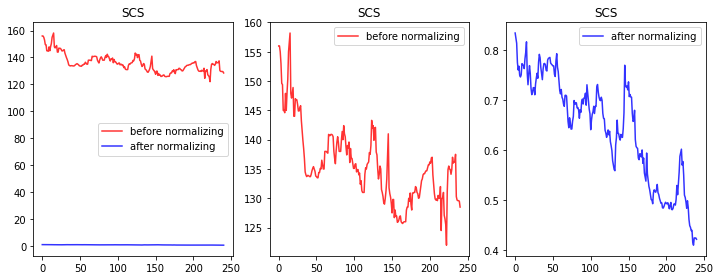

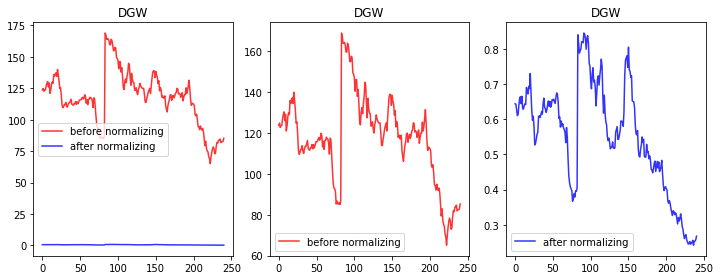

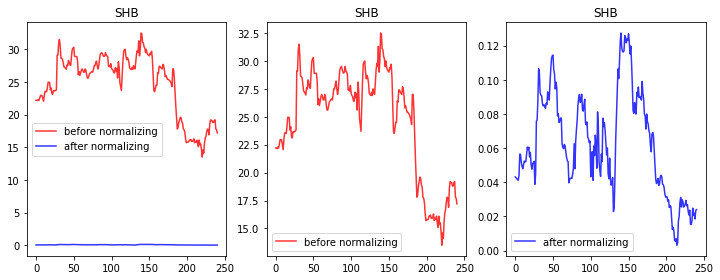

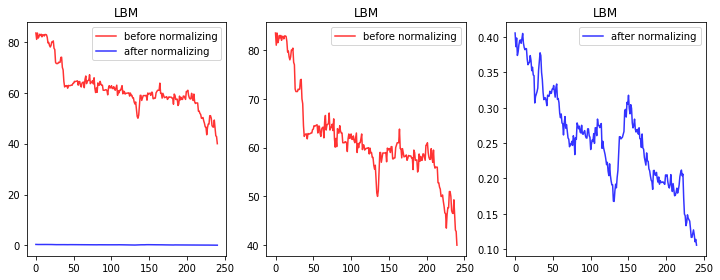

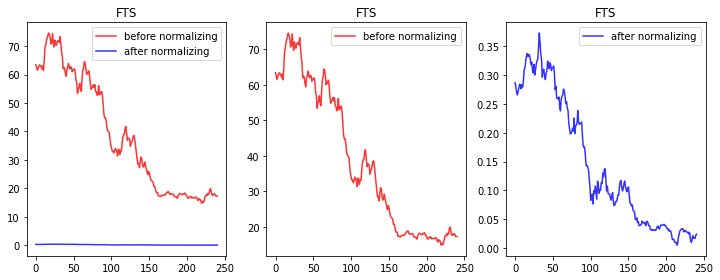

In [21]:
#plot
five_stock=[3,7,17,30,49]
for i in five_stock:
  fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
  # ảnh 1 trước và sau khi Normalize
  ax1.plot(inversed[i].ravel(), "r-", alpha=.8, label='before normalizing')
  ax1.plot(MinMaxScaler_Normalized[i].ravel(), "b-", alpha=.8, label='after normalizing')
  # ảnh 2 trước khi Normalize
  ax2.plot(inversed[i].ravel(), "r-", alpha=.8, label='before normalizing')
  # ảnh 3 sau khi Normalize
  ax3.plot(MinMaxScaler_Normalized[i].ravel(), "b-", alpha=.8, label='after normalizing')
  # Title
  ax1.set_title(stocks_name[i]); 
  ax2.set_title(stocks_name[i])
  ax3.set_title(stocks_name[i])
  ax1.legend(loc='best')
  ax2.legend(loc='best')
  ax3.legend(loc='best') 
  plt.tight_layout()
  plt.show()

## Standardize

In [22]:
# #import Standardize
from sklearn.preprocessing import StandardScaler
# from math import sqrt

In [23]:
# train standardization
scaler = StandardScaler()
scaler = scaler.fit(stocks)

In [24]:
# Normalize 
Standard_Normalized = scaler.transform(stocks)
Standard_Normalized[0]

array([1.98363836, 2.00886975, 2.00650756, 2.01825985, 2.03759976,
       2.03598092, 2.09408022, 2.06057449, 2.12153347, 2.14073365,
       2.19775636, 2.31255934, 2.33248543, 2.27102546, 2.19644865,
       2.24198786, 2.34950435, 2.43887838, 2.5451301 , 2.56301161,
       2.6385954 , 2.57617599, 2.54009349, 2.59978746, 2.62510817,
       2.60845996, 2.67720905, 2.72541727, 2.81265141, 2.82102315,
       2.79696572, 2.80592897, 2.87522952, 2.90434089, 2.64745996,
       2.57910259, 2.47588688, 2.60910585, 2.51402717, 2.48772187,
       2.50814004, 2.5085539 , 2.3889791 , 2.46850243, 2.56406953,
       2.59908   , 2.66920802, 2.57211919, 2.59223121, 2.66237052,
       2.65227954, 2.65811719, 2.56589448, 2.55676192, 2.66514167,
       2.52211975, 2.50009447, 2.55699517, 2.58669336, 2.60050897,
       2.66882184, 2.62922994, 2.55844166, 2.55338398, 2.57281334,
       2.58237712, 2.6328419 , 2.64194948, 2.75972056, 2.7248245 ,
       2.59874148, 2.35162033, 2.3295984 , 2.41229226, 2.36305

In [25]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(Standard_Normalized)
print(inversed[0])

[149.  150.  151.  152.5 152.8 152.3 152.3 152.5 152.9 153.  151.6 157.
 159.  156.5 154.  156.1 160.2 165.  168.  168.  168.  167.1 168.2 170.5
 170.6 170.  172.  172.  174.  174.  173.7 172.  171.8 172.6 165.2 162.
 160.5 164.6 159.9 155.4 156.7 156.5 152.  155.2 158.5 160.  162.8 160.
 161.  163.  163.  162.7 158.6 158.4 160.5 155.  154.2 156.4 156.8 157.1
 159.  160.  158.2 158.  158.  158.3 161.  161.  166.  166.  161.5 151.4
 148.8 149.9 148.7 149.2 148.7 150.  147.2 148.5 147.6 147.2 142.4 140.
 143.  148.  146.  145.5 151.6 151.8 153.1 154.2 154.1 155.1 155.2 155.7
 157.3 155.3 155.1 159.  157.  154.5 154.5 153.5 153.6 156.3 156.8 155.
 154.5 158.  159.9 160.  157.  158.8 160.  162.5 162.5 164.  166.5 169.2
 167.7 169.1 169.6 171.1 171.9 171.9 170.2 167.1 170.  171.2 166.  169.
 168.5 165.5 164.1 160.  156.9 156.8 155.1 153.7 153.9 152.  154.  155.5
 161.5 163.  163.8 157.9 153.9 150.2 152.1 153.5 154.  154.5 154.9 154.2
 151.7 152.2 150.5 153.  156.  160.4 161.2 167.1 169.8 16

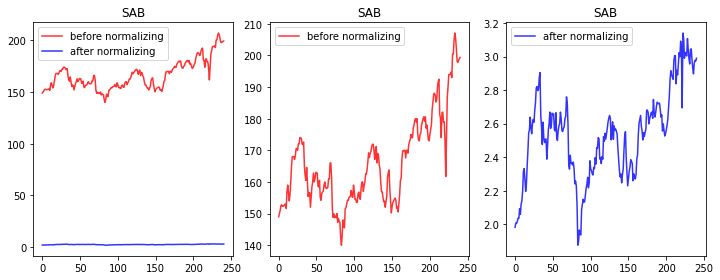

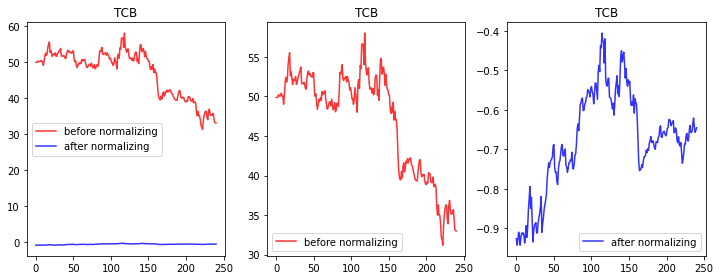

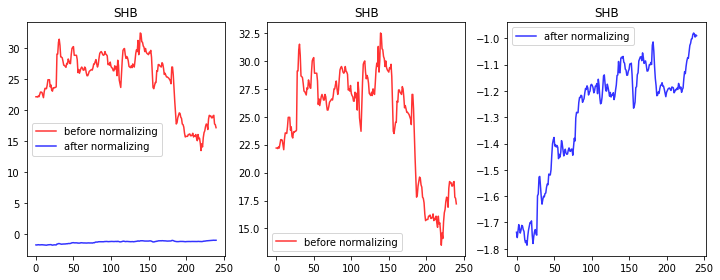

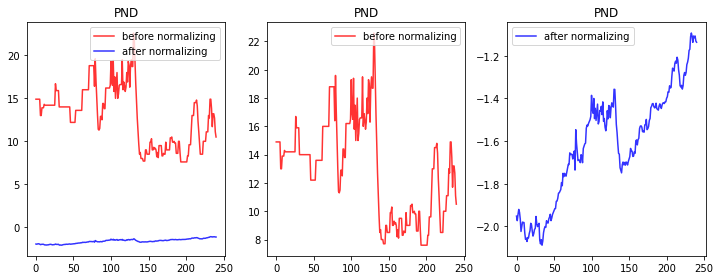

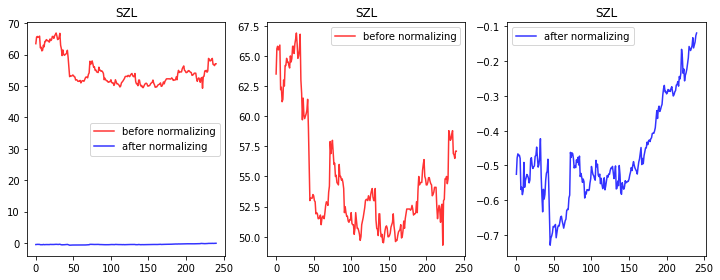

In [26]:
#plot
five_stock=[0,1,17,23,59]
for i in five_stock:
  fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
  # ảnh 1 trước và sau khi Normalize
  ax1.plot(inversed[i].ravel(), "r-", alpha=.8, label='before normalizing')
  ax1.plot(Standard_Normalized[i].ravel(), "b-", alpha=.8, label='after normalizing')
  # ảnh 2 trước khi Normalize
  ax2.plot(inversed[i].ravel(), "r-", alpha=.8, label='before normalizing')
  # ảnh 3 sau khi Normalize
  ax3.plot(Standard_Normalized[i].ravel(), "b-", alpha=.8, label='after normalizing')
  # Title
  ax1.set_title(stocks_name[i]); 
  ax2.set_title(stocks_name[i])
  ax3.set_title(stocks_name[i])
  ax1.legend(loc='best')
  ax2.legend(loc='best')
  ax3.legend(loc='best') 
  plt.tight_layout()
  plt.show()

## plot 3 pp scaler

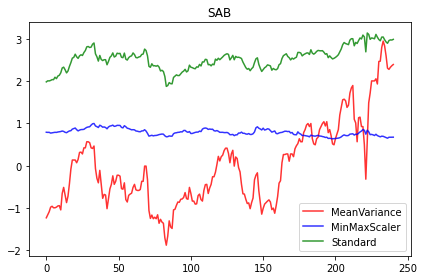

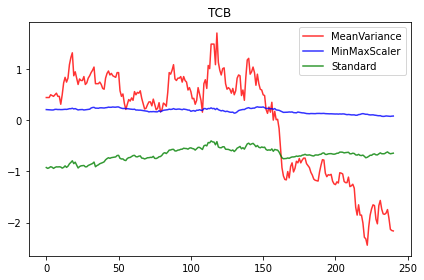

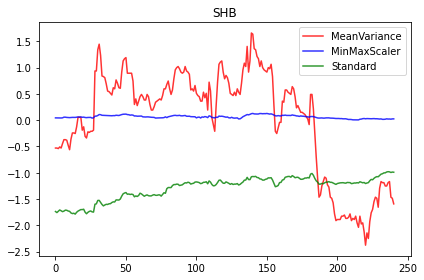

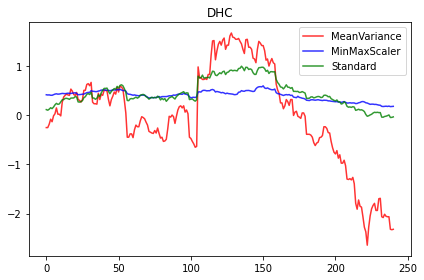

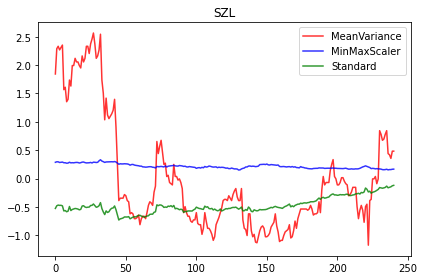

In [27]:
#plot
five_stock=[0,1,17,24,59]
for i in five_stock:
  # ảnh 1 trước và sau khi Normalize
  plt.plot(MeanVariance_Normalized[i].ravel(), "r-", alpha=.8, label='MeanVariance')
  plt.plot(MinMaxScaler_Normalized[i].ravel(), "b-", alpha=.8, label='MinMaxScaler')
  plt.plot(Standard_Normalized[i].ravel(), "g-", alpha=.8, label='Standard')
  # Title
  plt.title(stocks_name[i]); 
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

##Câu 3


In [28]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


In [29]:
#Chuẩn hoá dữ liệu stocks theo dạng timeseries cơ bản 
data = TimeSeriesScalerMeanVariance().fit_transform(stocks)
data = TimeSeriesResampler(sz = 60).fit_transform(data)
sz = data.shape[1]
#Khởi tạo chỉ số tâm ngẫu nhiên
seed = 0
numpy.random.seed(seed)

Euclidean K-means

chọn **k** với **elbow method**


In [35]:
dis = []
K = range(1,10)
for k in  K:
  #Thực hiện kmean với mỗi k từ 1->9 
  # 
  km = TimeSeriesKMeans(n_clusters=k, metric='euclidean',random_state=seed)
  km.fit_predict(data)
  #Tính tổng khoảng cách của các mẫu đến tâm cụm gần nhất của nó
  dis.append(km.inertia_)

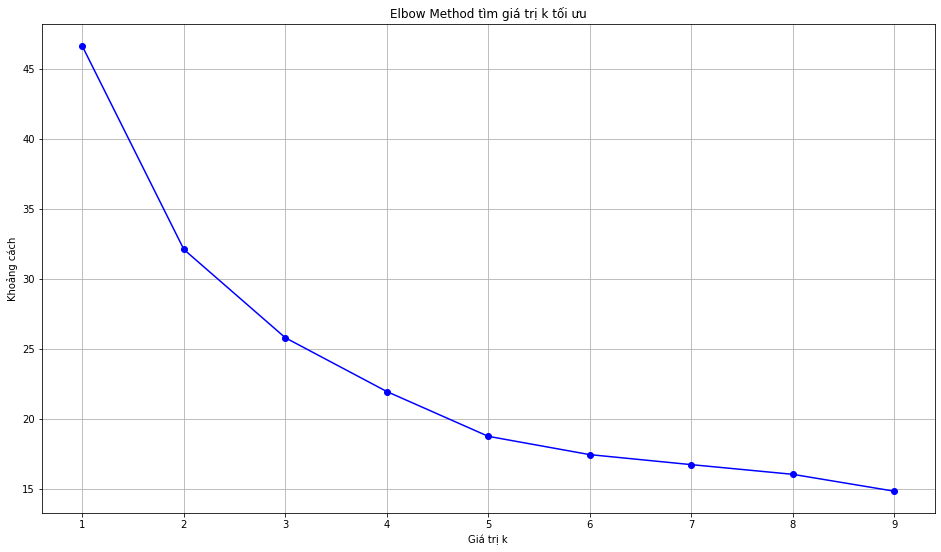

In [36]:
#Biểu diễn đồ thì tổng khoảng cách các mẫu đến tâm của nó đối với mỗi k khác nhau
plt.figure(figsize=(16,9))
plt.plot(K, dis, 'bo-')
plt.xlabel('Giá trị k')
plt.ylabel('Khoảng cách')
plt.title('Elbow Method tìm giá trị k tối ưu')
plt.grid(True)
plt.show()



In [83]:
#Với nguyên tắc Elbow Method để tìm 
k1 = 5
print(f'Quan sát biểu đồ ta thấy từ vị trí k = {k1} trở đi tổng giá trị khoảng cách thay đổi không nhiều')
print(f'Áp dụng Elbow Method ta có thể chọn k = {k1}')

Quan sát biểu đồ ta thấy từ vị trí k = 5 trở đi tổng giá trị khoảng cách thay đổi không nhiều
Áp dụng Elbow Method ta có thể chọn k = 5


In [84]:
# Euclidean k-means
print("Kết quả phân cụm bằng Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k1, metric='euclidean', random_state=seed)
#Ghi kết quả Cluster vào result1
result1 = km.fit_predict(data)
#Biểu diễn kết quả
print('Stoks code','   ','Cluster')
for i in range(len(list_stocks_code)):
  print(' ',list_stocks_code[i],'          ',result1[i])

Kết quả phân cụm bằng Euclidean k-means
Stoks code     Cluster
  SAB            1
  TCB            4
  MSN            2
  SCS            0
  VPB            3
  CTG            3
  MWG            3
  DGW            4
  VJC            1
  NVL            4
  DHG            0
  VIC            3
  SVC            0
  PTB            2
  VCB            3
  GAS            2
  HDC            2
  SHB            4
  PNJ            4
  FPT            2
  MSH            2
  STB            4
  PDR            2
  PND            2
  DHC            4
  TMS            2
  VNM            1
  DPG            0
  VRE            1
  NTC            1
  LBM            0
  VHM            3
  DPR            2
  GMD            2
  VCI            4
  TAC            0
  CTD            1
  MBS            2
  SJS            2
  PME            4
  VPG            2
  IMP            4
  HDG            2
  PHR            0
  SFI            0
  TCM            3
  HTN            0
  DRL            2
  HAH            2
  FTS 

DBA K-means

chọn **k** với **elbow method**


In [65]:
dis = []
K = range(1,10)
for k in  K:
  #Thực hiện kmean với mỗi k từ 1->9 
  # 
  km = TimeSeriesKMeans(n_clusters=k, metric='dtw',random_state=seed)
  km.fit_predict(data)
  #Tính tổng khoảng cách của các mẫu đến tâm cụm gần nhất của nó
  dis.append(km.inertia_)

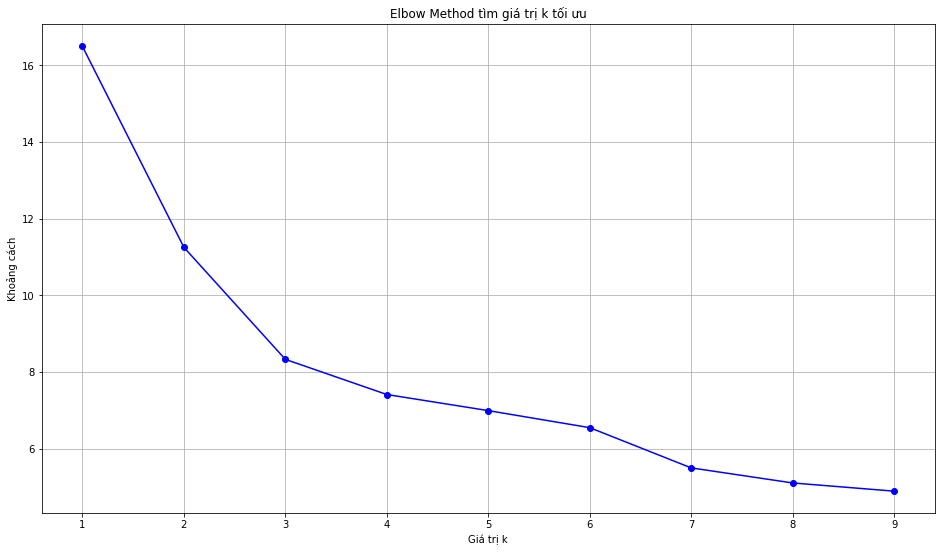

In [66]:
#Biểu diễn đồ thì tổng khoảng cách các mẫu đến tâm của nó đối với mỗi k khác nhau
plt.figure(figsize=(16,9))
plt.plot(K, dis, 'bo-')
plt.xlabel('Giá trị k')
plt.ylabel('Khoảng cách')
plt.title('Elbow Method tìm giá trị k tối ưu')
plt.grid(True)
plt.show()

In [81]:
#Với nguyên tắc Elbow Method để tìm 
k2 = 4
print(f'Quan sát biểu đồ ta thấy từ vị trí k = {k2} trở đi tổng giá trị khoảng cách thay đổi không nhiều')
print(f'Áp dụng Elbow Method ta có thể chọn k = {k2}')

Quan sát biểu đồ ta thấy từ vị trí k = 4 trở đi tổng giá trị khoảng cách thay đổi không nhiều
Áp dụng Elbow Method ta có thể chọn k = 4


In [79]:
#DBA k-means
print("Kết quả phân cụm bằng DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=k2, n_init=2, metric="dtw", max_iter_barycenter=10,random_state=seed)
#Ghi kết quả Cluster vào result2
result2 = dba_km.fit_predict(data)
#Biểu diễn kết quả
print('Stoks code','   ','Cluster')
for i in range(len(list_stocks_code)):
  print(' ',list_stocks_code[i],'          ',result2[i])

Kết quả phân cụm bằng DBA k-means
Stoks code     Cluster
  SAB            1
  TCB            0
  MSN            3
  SCS            2
  VPB            0
  CTG            1
  MWG            0
  DGW            0
  VJC            1
  NVL            0
  DHG            2
  VIC            1
  SVC            2
  PTB            3
  VCB            1
  GAS            3
  HDC            3
  SHB            0
  PNJ            0
  FPT            0
  MSH            3
  STB            0
  PDR            3
  PND            0
  DHC            0
  TMS            3
  VNM            1
  DPG            3
  VRE            1
  NTC            1
  LBM            3
  VHM            1
  DPR            3
  GMD            3
  VCI            2
  TAC            3
  CTD            2
  MBS            3
  SJS            3
  PME            0
  VPG            3
  IMP            0
  HDG            3
  PHR            2
  SFI            3
  TCM            0
  HTN            3
  DRL            3
  HAH            3
  FTS       

Soft DTW K-means 

chọn **k** với **elbow method**


In [77]:
dis = []
K = range(1,10)
for k in  K:
  #Thực hiện kmean với mỗi k từ 1->9 
  # 
  km = TimeSeriesKMeans(n_clusters=k, metric='softdtw',random_state=seed)
  km.fit_predict(data)
  #Tính tổng khoảng cách của các mẫu đến tâm cụm gần nhất của nó
  dis.append(km.inertia_)

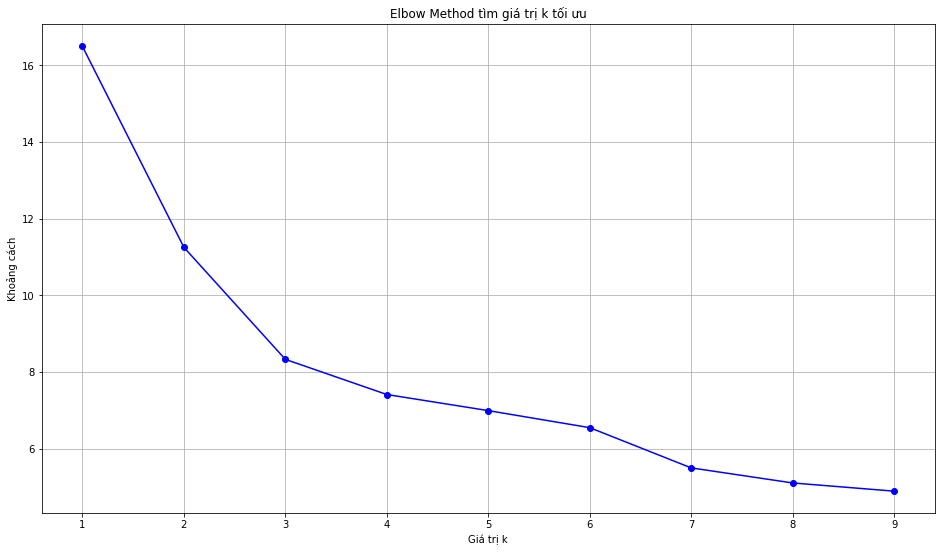

In [76]:
#Biểu diễn đồ thì tổng khoảng cách các mẫu đến tâm của nó đối với mỗi k khác nhau
plt.figure(figsize=(16,9))
plt.plot(K, dis, 'bo-')
plt.xlabel('Giá trị k')
plt.ylabel('Khoảng cách')
plt.title('Elbow Method tìm giá trị k tối ưu')
plt.grid(True)
plt.show()

In [82]:
#Với nguyên tắc Elbow Method để tìm 
k3 = 5
print(f'Quan sát biểu đồ ta thấy từ vị trí k = {k3} trở đi tổng giá trị khoảng cách thay đổi không nhiều')
print(f'Áp dụng Elbow Method ta có thể chọn k = {k3}')

Quan sát biểu đồ ta thấy từ vị trí k = 5 trở đi tổng giá trị khoảng cách thay đổi không nhiều
Áp dụng Elbow Method ta có thể chọn k = 5


In [70]:
# Soft-DTW-k-means
print("Kết quả phân cụm bằng Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k3, metric="softdtw", metric_params={"gamma": .01}, random_state=seed)
#Ghi kết quả Cluster vào result3
result3 = sdtw_km.fit_predict(data)
#Biểu diễn kết quả
print('Stoks code','   ','Cluster')
for i in range(len(list_stocks_code)):
  print(' ',list_stocks_code[i],'          ',result3[i])

Kết quả phân cụm bằng Soft-DTW k-means
Stoks code     Cluster
  SAB            1
  TCB            2
  MSN            0
  SCS            0
  VPB            3
  CTG            3
  MWG            3
  DGW            2
  VJC            1
  NVL            2
  DHG            4
  VIC            3
  SVC            0
  PTB            2
  VCB            3
  GAS            0
  HDC            0
  SHB            2
  PNJ            2
  FPT            2
  MSH            0
  STB            2
  PDR            2
  PND            2
  DHC            2
  TMS            0
  VNM            1
  DPG            0
  VRE            1
  NTC            1
  LBM            0
  VHM            3
  DPR            0
  GMD            0
  VCI            4
  TAC            0
  CTD            4
  MBS            0
  SJS            0
  PME            2
  VPG            0
  IMP            2
  HDG            0
  PHR            4
  SFI            0
  TCM            3
  HTN            3
  DRL            0
  HAH            0
  FTS  

Plot


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


<Figure size 432x288 with 0 Axes>

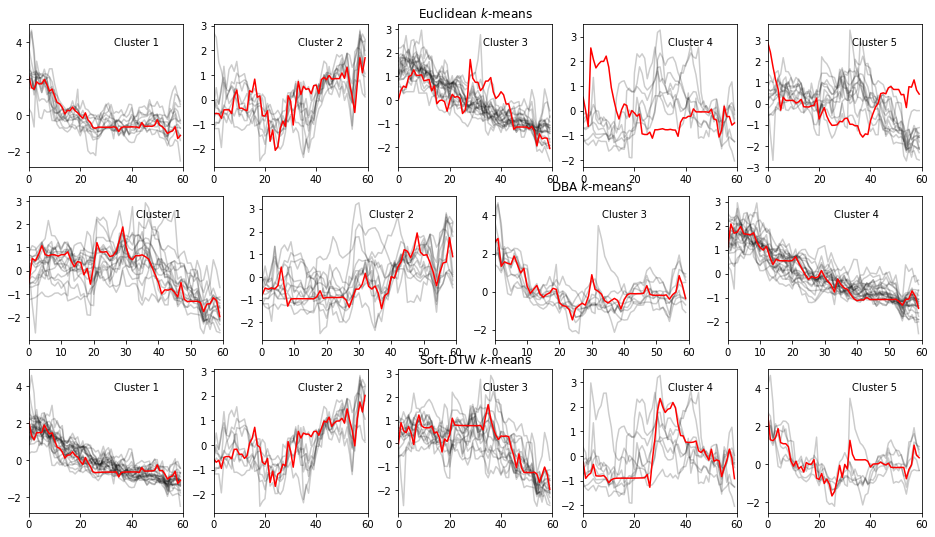

In [74]:
plt.figure()
plt.subplots(figsize = (16,9))

#Euclidean k-means
for yi in range(k1):
    plt.subplot(3, k1, yi + 1)
    #biểu diễn các mã trong Culster yi
    for xx in data[result1 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #biểu diễn tâm của Culster 
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.text(0.55, 0.85,f'Cluster {(yi + 1)}', transform=plt.gca().transAxes)
    if yi == (k1//2):
        plt.title("Euclidean $k$-means")

# DBA-k-means
for yi in range(k2):
    plt.subplot(3, k2, k2 + 1 + yi)
    #biểu diễn các mã trong Culster yi
    for xx in data[result2 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #biểu diễn tâm của Culster 
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.text(0.55, 0.85,f'Cluster {(yi + 1)}', transform=plt.gca().transAxes)
    if yi == (k2//2):
        plt.title("DBA $k$-means")


# Soft-DTW-k-means
for yi in range(k3):
    plt.subplot(3, k3, k1 + k2 +1 + 1 + yi)
    #biểu diễn các mã trong Culster yi
    for xx in data[result3 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #biểu diễn tâm của Culster 
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.text(0.55, 0.85,f'Cluster {(yi + 1)}', transform=plt.gca().transAxes)
    if yi == (k3 // 2):
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()